In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1= pd.read_csv('/content/fear_greed_index.csv')
df_2= pd.read_csv('/content/historical_data.csv')

/tmp/ipython-input-1930099391.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2= pd.read_csv('/content/historical_data.csv')


In [3]:
df_1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
df_1['date'] = pd.to_datetime(df_1['date'])

In [11]:
df_1 = df_1[['classification','date']]

In [12]:
df_1=df_1.drop_duplicates()

In [13]:
df_1.head()

,classification,date
0,Fear,2018-02-01
1,Extreme Fear,2018-02-02
2,Fear,2018-02-03
3,Extreme Fear,2018-02-04
4,Extreme Fear,2018-02-05


In [14]:
df_2

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55779,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,21.5900,4.09,88.30,BUY,24-02-2025 10:37,534.553421,Buy,0.0,0xfaac4f379773301d991b041e5af15102019d003fe232...,7.438475e+10,True,0.001431,5.050000e+14,1.740000e+12
55780,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,21.5950,91.09,1967.09,BUY,24-02-2025 10:37,538.641990,Buy,0.0,0xfaac4f379773301d991b041e5af15102019d003fe232...,7.438475e+10,True,0.031881,7.510000e+14,1.740000e+12
55781,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,21.5970,90.69,1958.63,BUY,24-02-2025 10:37,629.700108,Buy,0.0,0xfaac4f379773301d991b041e5af15102019d003fe232...,7.438475e+10,True,0.031741,3.560000e+14,1.740000e+12
55782,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,21.5980,273.28,5902.30,BUY,24-02-2025 10:37,720.358367,Buy,0.0,0xfaac4f379773301d991b041e5af15102019d003fe232...,7.438475e+10,True,0.095648,5.110000e+14,1.740000e+12


In [15]:
print(df_2.columns.tolist())

['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [16]:
df_1.columns = df_1.columns.str.strip().str.lower()
df_2.columns = df_2.columns.str.strip().str.lower()

In [18]:
df_2 = df_2.rename(columns={
    'execution price': 'price',
    'size tokens': 'size_tokens',
    'size usd': 'size_usd',
    'timestamp ist': 'time_ist',
    'timestamp': 'time',
    'closed pnl': 'closedpnl'
})


In [23]:
df_2['time'] = pd.to_datetime(df_2['time_ist'], format="%d-%m-%Y %H:%M")
df_2['date'] = pd.to_datetime(df_2['time'].dt.date)

In [21]:
numeric_cols = ['price', 'size_tokens', 'size_usd', 'closedpnl', 'fee']

for col in numeric_cols:
    if col in df_2.columns:
        df_2[col] = pd.to_numeric(df_2[col], errors='coerce')


In [28]:
merged_df = pd.merge(
    df_2,
    df_1,
    on='date',
    how='inner'
)


In [29]:
merged_df.head()

,account,coin,price,size_tokens,size_usd,side,time_ist,start position,side,closedpnl,transaction hash,order id,crossed,fee,trade id,time,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,2024-12-02 22:50:00,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,2024-12-02 22:50:00,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,2024-12-02 22:50:00,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,2024-12-02 22:50:00,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,2024-12-02 22:50:00,2024-12-02,Extreme Greed


In [30]:
merged_df.groupby('classification')['closedpnl'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,2362.0,155.533552,2731.687199,-29370.11980,0.0,0.00000,23.286360,115287.00000
Extreme Greed,10533.0,150.996045,1390.246753,-10259.46800,0.0,0.67308,27.307455,44223.45187
Fear,14528.0,128.173766,1766.590865,-19841.24014,0.0,0.00000,13.946632,135329.09010
Greed,17256.0,88.545211,1493.359315,-117990.10410,0.0,0.00000,9.757602,71535.71674
Neutral,11099.0,97.386743,854.256778,-18993.46842,0.0,0.00000,23.256540,48504.09555


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['25%']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('25%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('25%')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['25%']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('25%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('25%')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['25%']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('25%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('25%')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['25%']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('25%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('25%')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
_df_12['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
merged_df.groupby('classification')['size_usd'].mean()


,size_usd
classification,
Extreme Fear,7729.308086
Extreme Greed,7463.084632
Fear,19523.143638
Greed,12821.269269
Neutral,10699.058292


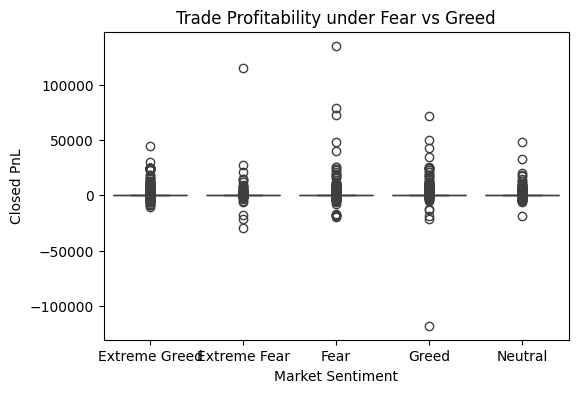

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(data=merged_df, x='classification', y='closedpnl')
plt.title('Trade Profitability under Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.savefig("outputs/pnl_fear_vs_greed.png", bbox_inches='tight')
plt.show()

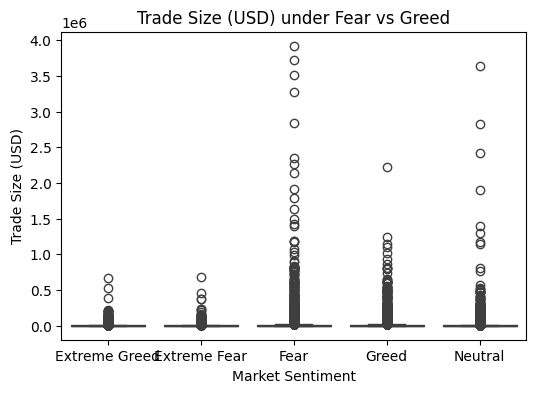

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(data=merged_df, x='classification', y='size_usd')
plt.title('Trade Size (USD) under Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Size (USD)')
plt.savefig("outputs/size_vs_greed.png", bbox_inches='tight')

plt.show()



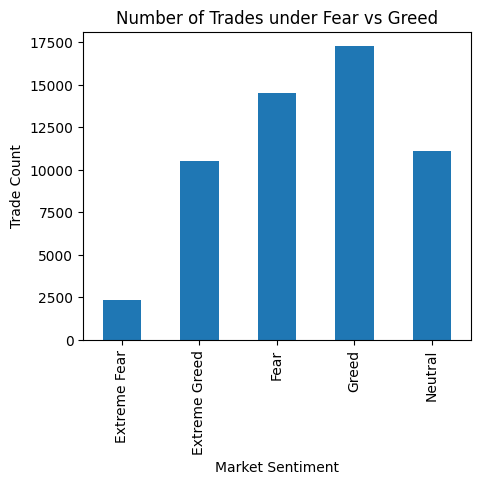

In [49]:
trade_counts = merged_df.groupby('classification').size()

trade_counts.plot(kind='bar', figsize=(5,4))
plt.title('Number of Trades under Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Count')
plt.savefig("outputs/trades_fear_vs_greed.png", bbox_inches='tight')

plt.show()



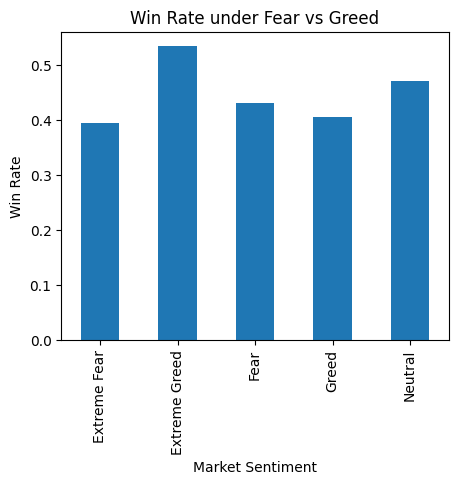

In [50]:
win_rate = (
    merged_df
    .assign(win=lambda x: x['closedpnl'] > 0)
    .groupby('classification')['win']
    .mean()
)

win_rate.plot(kind='bar', figsize=(5,4))
plt.title('Win Rate under Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate')
plt.savefig("outputs/win_fearvs_greed.png", bbox_inches='tight')
plt.show()


In [45]:
!mkdir -p csv_files outputs


In [46]:
merged_df.to_csv("csv_files/merged_data.csv", index=False)


In [52]:
!zip -r ds_yash.zip notebook_1.ipynb csv_files outputs


	zip warning: name not matched: notebook_1.ipynb
updating: csv_files/ (stored 0%)
updating: csv_files/merged_data.csv (deflated 97%)
updating: outputs/ (stored 0%)
updating: outputs/pnl_fear_vs_greed.png (deflated 13%)
updating: outputs/size_vs_greed.png (deflated 11%)
updating: outputs/trades_fear_vs_greed.png (deflated 14%)
updating: outputs/win_fearvs_greed.png (deflated 15%)
